# Setup

In [2]:
from collections import Counter
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve, IsotonicRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import statsmodels.formula.api as smf
import xgboost as xgb

In [3]:
from ml_func import analyze_accuracy, get_predictions, plot_calibration
from ml_func import setup_chess_data

In [4]:
X_train, X_test, y_train, y_test = setup_chess_data()

# Train and Predict

In [5]:
test_obs = list(X_train.iloc[0, :].values)

In [6]:
params = {'booster': 'gbtree', 'eval_metric': 'logloss', 'max_depth': 3,
          'gamma': 0.1, 'colsample_bytree': 1, 'subsample': 1, 'min_child_weight': 3, 'n_jobs': -1,
         'objective': 'binary:logistic'}
xgb_matrix = xgb.DMatrix(X_train, label=y_train)
booster = xgb.train(params=params, dtrain=xgb_matrix, num_boost_round=100)

In [7]:
temp = xgb.DMatrix(np.array([test_obs]), feature_names = X_train.columns)
test = booster.predict(temp)
print(test)

[0.99814034]


In [16]:
preds = booster.predict(xgb.DMatrix(X_test))
for x in range(len(preds)):
    print('Actual', y_test.values[x], 'Prediction', preds[x])

Actual 1.0 Prediction 0.99846613
Actual 1.0 Prediction 0.7642213
Actual 1.0 Prediction 0.9997167
Actual 1.0 Prediction 0.99910516
Actual 1.0 Prediction 0.99709964
Actual 0.0 Prediction 0.18769038
Actual 1.0 Prediction 0.99842584
Actual 1.0 Prediction 0.9143439
Actual 1.0 Prediction 0.9215073
Actual 1.0 Prediction 0.99781775
Actual 1.0 Prediction 0.9979882
Actual 1.0 Prediction 0.99657094
Actual 1.0 Prediction 0.9535337
Actual 1.0 Prediction 0.9501249
Actual 1.0 Prediction 0.9795711
Actual 1.0 Prediction 0.94892275
Actual 1.0 Prediction 0.9912723
Actual 1.0 Prediction 0.9996569
Actual 1.0 Prediction 0.99218595
Actual 1.0 Prediction 0.9999126
Actual 1.0 Prediction 0.9995154
Actual 1.0 Prediction 0.99396646
Actual 1.0 Prediction 0.99806327
Actual 1.0 Prediction 0.9660898
Actual 1.0 Prediction 0.9988141
Actual 1.0 Prediction 0.9994166
Actual 1.0 Prediction 0.93711483
Actual 1.0 Prediction 0.996436
Actual 1.0 Prediction 0.99775547
Actual 0.0 Prediction 0.3234089
Actual 1.0 Prediction 0.9945

Actual 1.0 Prediction 0.991487
Actual 1.0 Prediction 0.99146605
Actual 1.0 Prediction 0.99652785
Actual 1.0 Prediction 0.9597057
Actual 1.0 Prediction 0.8277422
Actual 1.0 Prediction 0.9999026
Actual 1.0 Prediction 0.99903
Actual 1.0 Prediction 0.987069
Actual 1.0 Prediction 0.9958282
Actual 0.0 Prediction 0.31925464
Actual 1.0 Prediction 0.96570945
Actual 1.0 Prediction 0.979238
Actual 1.0 Prediction 0.9995023
Actual 1.0 Prediction 0.9999895
Actual 1.0 Prediction 0.9637265
Actual 1.0 Prediction 0.99924374
Actual 1.0 Prediction 0.99845994
Actual 1.0 Prediction 0.99669516
Actual 1.0 Prediction 0.8852135
Actual 1.0 Prediction 0.9857184
Actual 1.0 Prediction 0.96799356
Actual 1.0 Prediction 0.8124928
Actual 0.0 Prediction 0.4215699
Actual 1.0 Prediction 0.99989426
Actual 1.0 Prediction 0.94305
Actual 1.0 Prediction 0.96818805
Actual 1.0 Prediction 0.9968227
Actual 0.0 Prediction 0.16481909
Actual 1.0 Prediction 0.98769593
Actual 1.0 Prediction 0.9999492
Actual 1.0 Prediction 0.99614125
Ac

Actual 1.0 Prediction 0.8650682
Actual 1.0 Prediction 0.9676802
Actual 1.0 Prediction 0.9026455
Actual 1.0 Prediction 0.93416166
Actual 1.0 Prediction 0.9416814
Actual 1.0 Prediction 0.9598627
Actual 1.0 Prediction 0.85369605
Actual 1.0 Prediction 0.94779646
Actual 1.0 Prediction 0.9650522
Actual 1.0 Prediction 0.93817
Actual 1.0 Prediction 0.9985291
Actual 1.0 Prediction 0.893579
Actual 1.0 Prediction 0.9762092
Actual 1.0 Prediction 0.89150745
Actual 1.0 Prediction 0.999337
Actual 1.0 Prediction 0.9954744
Actual 1.0 Prediction 0.99628854
Actual 1.0 Prediction 0.99321544
Actual 1.0 Prediction 0.99537164
Actual 1.0 Prediction 0.9737344
Actual 1.0 Prediction 0.90902644
Actual 1.0 Prediction 0.99994826
Actual 1.0 Prediction 0.99619496
Actual 1.0 Prediction 0.96932393
Actual 1.0 Prediction 0.9488444
Actual 1.0 Prediction 0.9996112
Actual 0.0 Prediction 0.33449626
Actual 1.0 Prediction 0.99149936
Actual 1.0 Prediction 0.99704736
Actual 1.0 Prediction 0.9960735
Actual 1.0 Prediction 0.990219

Actual 1.0 Prediction 0.92291594
Actual 0.0 Prediction 0.23535709
Actual 1.0 Prediction 0.99989974
Actual 0.0 Prediction 0.37271655
Actual 1.0 Prediction 0.997547
Actual 1.0 Prediction 0.81664383
Actual 1.0 Prediction 0.98540026
Actual 1.0 Prediction 0.9956975
Actual 1.0 Prediction 0.9543026
Actual 1.0 Prediction 0.99796057
Actual 1.0 Prediction 0.9995358
Actual 0.0 Prediction 0.5421285
Actual 1.0 Prediction 0.9984125
Actual 0.0 Prediction 0.38032153
Actual 1.0 Prediction 0.8102924
Actual 1.0 Prediction 0.9887821
Actual 1.0 Prediction 0.99996614
Actual 1.0 Prediction 0.9997377
Actual 1.0 Prediction 0.99989057
Actual 1.0 Prediction 0.9995415
Actual 1.0 Prediction 0.99976677
Actual 1.0 Prediction 0.9908717
Actual 1.0 Prediction 0.88749254
Actual 1.0 Prediction 0.994058
Actual 1.0 Prediction 0.9219823
Actual 1.0 Prediction 0.93693846
Actual 1.0 Prediction 0.9504268
Actual 1.0 Prediction 0.9995622
Actual 1.0 Prediction 0.9990497
Actual 1.0 Prediction 0.84940624
Actual 0.0 Prediction 0.3755

Actual 1.0 Prediction 0.9913128
Actual 1.0 Prediction 0.8861766
Actual 1.0 Prediction 0.997051
Actual 1.0 Prediction 0.86171424
Actual 1.0 Prediction 0.9457701
Actual 1.0 Prediction 0.98427343
Actual 1.0 Prediction 0.97717434
Actual 1.0 Prediction 0.92716986
Actual 1.0 Prediction 0.9972187
Actual 1.0 Prediction 0.99842656
Actual 1.0 Prediction 0.9154827
Actual 1.0 Prediction 0.99969304
Actual 1.0 Prediction 0.9999763
Actual 1.0 Prediction 0.99829274
Actual 1.0 Prediction 0.9999529
Actual 1.0 Prediction 0.9978946
Actual 1.0 Prediction 0.9958978
Actual 1.0 Prediction 0.9993044
Actual 1.0 Prediction 0.9879474
Actual 0.0 Prediction 0.224112
Actual 1.0 Prediction 0.99930954
Actual 1.0 Prediction 0.9961119
Actual 1.0 Prediction 0.9951939
Actual 1.0 Prediction 0.92324096
Actual 0.0 Prediction 0.4120326
Actual 1.0 Prediction 0.9996331
Actual 1.0 Prediction 0.9965888
Actual 1.0 Prediction 0.99102837
Actual 1.0 Prediction 0.8766376
Actual 1.0 Prediction 0.99802554
Actual 1.0 Prediction 0.9008376

Actual 1.0 Prediction 0.98643327
Actual 1.0 Prediction 0.98080015
Actual 1.0 Prediction 0.9985934
Actual 1.0 Prediction 0.9997278
Actual 1.0 Prediction 0.9371443
Actual 1.0 Prediction 0.99403834
Actual 1.0 Prediction 0.9419016
Actual 1.0 Prediction 0.9944846
Actual 0.0 Prediction 0.38334388
Actual 1.0 Prediction 0.98287416
Actual 0.0 Prediction 0.3430355
Actual 1.0 Prediction 0.99770206
Actual 1.0 Prediction 0.99975103
Actual 1.0 Prediction 0.9999529
Actual 1.0 Prediction 0.921391
Actual 1.0 Prediction 0.95374596
Actual 1.0 Prediction 0.9983158
Actual 1.0 Prediction 0.99746764
Actual 1.0 Prediction 0.84544545
Actual 1.0 Prediction 0.9969208
Actual 1.0 Prediction 0.9996704
Actual 1.0 Prediction 0.99954456
Actual 0.0 Prediction 0.36096653
Actual 1.0 Prediction 0.99687576
Actual 1.0 Prediction 0.99668664
Actual 1.0 Prediction 0.91910905
Actual 1.0 Prediction 0.9646233
Actual 1.0 Prediction 0.9445497
Actual 1.0 Prediction 0.9870027
Actual 1.0 Prediction 0.9963433
Actual 1.0 Prediction 0.92

Actual 1.0 Prediction 0.9588244
Actual 1.0 Prediction 0.92284477
Actual 1.0 Prediction 0.98527735
Actual 1.0 Prediction 0.9863452
Actual 1.0 Prediction 0.9989674
Actual 1.0 Prediction 0.99913824
Actual 1.0 Prediction 0.98483074
Actual 1.0 Prediction 0.99959165
Actual 1.0 Prediction 0.97011584
Actual 1.0 Prediction 0.99230814
Actual 0.0 Prediction 0.29322153
Actual 1.0 Prediction 0.99745804
Actual 1.0 Prediction 0.999577
Actual 1.0 Prediction 0.9951231
Actual 1.0 Prediction 0.99099195
Actual 1.0 Prediction 0.9998198
Actual 1.0 Prediction 0.9939911
Actual 1.0 Prediction 0.89912724
Actual 1.0 Prediction 0.9927811
Actual 1.0 Prediction 0.90050894
Actual 1.0 Prediction 0.8419276
Actual 1.0 Prediction 0.96128917
Actual 1.0 Prediction 0.9917066
Actual 1.0 Prediction 0.98977154
Actual 1.0 Prediction 0.99989116
Actual 1.0 Prediction 0.9992924
Actual 0.0 Prediction 0.3657814
Actual 1.0 Prediction 0.99870896
Actual 1.0 Prediction 0.9960294
Actual 1.0 Prediction 0.9906357
Actual 1.0 Prediction 0.9

Actual 1.0 Prediction 0.9996506
Actual 1.0 Prediction 0.9996307
Actual 1.0 Prediction 0.90850675
Actual 1.0 Prediction 0.936305
Actual 1.0 Prediction 0.9994098
Actual 0.0 Prediction 0.33950034
Actual 1.0 Prediction 0.99565554
Actual 1.0 Prediction 0.981931
Actual 1.0 Prediction 0.96574515
Actual 1.0 Prediction 0.8835993
Actual 1.0 Prediction 0.98401386
Actual 1.0 Prediction 0.99945337
Actual 1.0 Prediction 0.9996376
Actual 1.0 Prediction 0.99460274
Actual 1.0 Prediction 0.8887981
Actual 1.0 Prediction 0.99687165
Actual 1.0 Prediction 0.9910944
Actual 1.0 Prediction 0.9146772
Actual 1.0 Prediction 0.9985738
Actual 1.0 Prediction 0.9352521
Actual 1.0 Prediction 0.9993001
Actual 1.0 Prediction 0.9993561
Actual 1.0 Prediction 0.9989498
Actual 1.0 Prediction 0.99845994
Actual 1.0 Prediction 0.9919397
Actual 0.0 Prediction 0.39622837
Actual 1.0 Prediction 0.9969221
Actual 1.0 Prediction 0.99920964
Actual 1.0 Prediction 0.97538996
Actual 1.0 Prediction 0.92810744
Actual 1.0 Prediction 0.96502

Actual 0.0 Prediction 0.22609185
Actual 1.0 Prediction 0.9089512
Actual 1.0 Prediction 0.9825225
Actual 1.0 Prediction 0.8913306
Actual 1.0 Prediction 0.9978935
Actual 0.0 Prediction 0.34051967
Actual 1.0 Prediction 0.94727844
Actual 1.0 Prediction 0.99961627
Actual 1.0 Prediction 0.91885585
Actual 1.0 Prediction 0.9996829
Actual 1.0 Prediction 0.99982244
Actual 1.0 Prediction 0.863584
Actual 1.0 Prediction 0.8959489
Actual 1.0 Prediction 0.96769005
Actual 1.0 Prediction 0.9219823
Actual 1.0 Prediction 0.99177235
Actual 1.0 Prediction 0.78718245
Actual 0.0 Prediction 0.32964584
Actual 1.0 Prediction 0.9865659
Actual 1.0 Prediction 0.8410656
Actual 1.0 Prediction 0.9996025
Actual 1.0 Prediction 0.9973018
Actual 0.0 Prediction 0.36525086
Actual 1.0 Prediction 0.99207485
Actual 1.0 Prediction 0.9996846
Actual 1.0 Prediction 0.96874076
Actual 1.0 Prediction 0.93612516
Actual 1.0 Prediction 0.9256822
Actual 1.0 Prediction 0.82266545
Actual 1.0 Prediction 0.8899959
Actual 1.0 Prediction 0.88

Actual 1.0 Prediction 0.99671364
Actual 1.0 Prediction 0.9922707
Actual 1.0 Prediction 0.9996662
Actual 1.0 Prediction 0.9839998
Actual 1.0 Prediction 0.99984574
Actual 1.0 Prediction 0.9936706
Actual 1.0 Prediction 0.99555993
Actual 1.0 Prediction 0.9999652
Actual 1.0 Prediction 0.99834645
Actual 1.0 Prediction 0.9212695
Actual 1.0 Prediction 0.9992563
Actual 1.0 Prediction 0.9036889
Actual 1.0 Prediction 0.9861287
Actual 1.0 Prediction 0.99654776
Actual 1.0 Prediction 0.99977213
Actual 1.0 Prediction 0.9990416
Actual 1.0 Prediction 0.932167
Actual 1.0 Prediction 0.94553995
Actual 1.0 Prediction 0.9997378
Actual 1.0 Prediction 0.9964282
Actual 1.0 Prediction 0.89422905
Actual 1.0 Prediction 0.9982926
Actual 0.0 Prediction 0.26375815
Actual 1.0 Prediction 0.9710399
Actual 1.0 Prediction 0.9974795
Actual 1.0 Prediction 0.98797125
Actual 1.0 Prediction 0.985932
Actual 1.0 Prediction 0.99952066
Actual 1.0 Prediction 0.9977428
Actual 1.0 Prediction 0.99453557
Actual 1.0 Prediction 0.880418

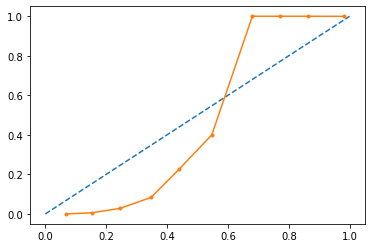

In [17]:
plot_calibration(y_test, preds)

In [24]:
#test = smf.logit()
prediction_df = pd.DataFrame(data = {'actual': y_test, 'pred': preds})
logit = smf.logit(data = prediction_df, formula = 'actual ~ pred').fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.018245
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 actual   No. Observations:                 5612
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                  0.9437
Time:                        16:33:24   Log-Likelihood:                -102.39
converged:                       True   LL-Null:                       -1819.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3050      0.682    -16.572      0.000     -12.642      -9.968
pred          19.7187      1

In [29]:
new_df = pd.DataFrame(data = {'Intercept' : preds, 'pred':preds})
new_df['Intercept'] = 1
new_values = logit.predict(new_df)

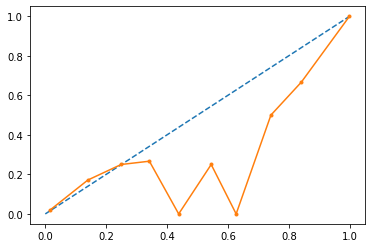

In [30]:
plot_calibration(y_test, new_values)

# Testing Isotonic Fit

In [8]:
isotonic = IsotonicRegression(out_of_bounds='clip')

preds = booster.predict(xgb.DMatrix(X_train))

isotonic.fit(preds, y_train)
isotonic_probs = isotonic.predict(preds)
isotonic_probs.max(), isotonic_probs.min()

(1.0, 0.0)